In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import numpy as np
data = pd.read_csv("/kaggle/input/anya-bondman/trainData.csv") #Train Dataset
data_t = pd.read_csv("/kaggle/input/anya-bondman/testData.csv") #Test Dataset

In [3]:
data_t.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714
1,2,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431
2,3,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111
3,4,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061
4,5,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734


In [4]:
data.shape

(523174, 23)

In [5]:
data[data['is_fraud']==0].shape[0]


515668

In [6]:
data[data['is_fraud']==1].shape[0]

7506

In [7]:
data_t.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [8]:
data.describe()

,id,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,523174.000000,5.231740e+05,523174.000000,523174.000000,523174.000000,523174.000000,5.231740e+05,5.231740e+05,523174.000000,523174.000000,523174.000000
mean,261587.500000,4.179945e+17,74.126999,48778.123106,38.545987,-90.222333,8.851568e+04,1.349238e+09,38.546871,-90.222705,0.014347
std,151027.469204,1.309874e+18,164.627380,26915.789078,5.072909,13.774292,3.007854e+05,1.285058e+07,5.106024,13.786031,0.118917
min,1.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.032277,-166.664828,0.000000
25%,130794.250000,1.800429e+14,9.700000,26041.000000,34.668900,-96.798000,7.430000e+02,1.338738e+09,34.751576,-96.901801,0.000000
50%,261587.500000,3.521417e+15,47.680000,48154.000000,39.371600,-87.461600,2.456000e+03,1.349243e+09,39.372253,-87.426508,0.000000
75%,392380.750000,4.642255e+15,83.870000,72042.000000,41.940400,-80.158000,2.032800e+04,1.359389e+09,41.958544,-80.219874,0.000000
max,523174.000000,4.992346e+18,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.950902,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     523174 non-null  int64  
 1   trans_date_trans_time  523174 non-null  object 
 2   cc_num                 523174 non-null  int64  
 3   merchant               523174 non-null  object 
 4   category               523174 non-null  object 
 5   amt                    523174 non-null  float64
 6   first                  523174 non-null  object 
 7   last                   523174 non-null  object 
 8   gender                 523174 non-null  object 
 9   street                 523174 non-null  object 
 10  city                   523174 non-null  object 
 11  state                  523174 non-null  object 
 12  zip                    523174 non-null  int64  
 13  lat                    523174 non-null  float64
 14  long                   523174 non-nu

# EDA

In [10]:
data.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
data.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0
2,3,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,Monica,Lane,F,3270 Scott Islands,...,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,c8fcf575540e37ce0822cd040148ff57,1361012178,44.455449,-70.809148,0
3,4,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,David,Lewis,M,1499 Michael Rue,...,38.8954,-77.1633,207410,Mudlogger,1984-07-03,9e9cde0e0963ac746a2cc9938e171c9a,1367338456,39.476941,-77.613438,0
4,5,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,Ronald,Carson,M,870 Rocha Drive,...,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,0742473d7f6261ce366b43ece063faf3,1354741679,40.863808,-74.674018,0


In [12]:
data = data.drop("trans_num", axis=1)


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     523174 non-null  int64  
 1   trans_date_trans_time  523174 non-null  object 
 2   cc_num                 523174 non-null  int64  
 3   merchant               523174 non-null  object 
 4   category               523174 non-null  object 
 5   amt                    523174 non-null  float64
 6   first                  523174 non-null  object 
 7   last                   523174 non-null  object 
 8   gender                 523174 non-null  object 
 9   street                 523174 non-null  object 
 10  city                   523174 non-null  object 
 11  state                  523174 non-null  object 
 12  zip                    523174 non-null  int64  
 13  lat                    523174 non-null  float64
 14  long                   523174 non-nu

In [14]:
data.cc_num.value_counts()

cc_num
180048185037117        1298
6011504998544485       1280
345933964507467        1271
630451534402           1270
372509258176510        1269
                       ... 
3545578418030657          7
4734310647841293          7
180097223252063           7
4714017207228610634       7
340187018810220           7
Name: count, Length: 983, dtype: int64

In [15]:
data = data.drop(columns=["first","last"])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     523174 non-null  int64  
 1   trans_date_trans_time  523174 non-null  object 
 2   cc_num                 523174 non-null  int64  
 3   merchant               523174 non-null  object 
 4   category               523174 non-null  object 
 5   amt                    523174 non-null  float64
 6   gender                 523174 non-null  object 
 7   street                 523174 non-null  object 
 8   city                   523174 non-null  object 
 9   state                  523174 non-null  object 
 10  zip                    523174 non-null  int64  
 11  lat                    523174 non-null  float64
 12  long                   523174 non-null  float64
 13  city_pop               523174 non-null  int64  
 14  job                    523174 non-nu

In [17]:
data["recency"] = data.groupby(by="cc_num")["unix_time"].diff()
data

,id,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,recency
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,M,83690 Nicholas Ports Apt. 846,Oakland,TN,...,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,1355567710,35.189455,-90.121666,0,NaN
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1334094593,49.004316,-122.745016,0,NaN
2,3,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,F,3270 Scott Islands,East Andover,ME,...,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,1361012178,44.455449,-70.809148,0,NaN
3,4,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,1499 Michael Rue,Arlington,VA,...,38.8954,-77.1633,207410,Mudlogger,1984-07-03,1367338456,39.476941,-77.613438,0,NaN
4,5,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,M,870 Rocha Drive,Harrington Park,NJ,...,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,1354741679,40.863808,-74.674018,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523169,523170,2020-06-17 05:58:27,5154903938030655,"fraud_Kerluke, Considine and Macejkovic",misc_net,22.71,F,825 Martinez Springs Apt. 625,White Sulphur Springs,WV,...,37.7827,-80.3129,5216,Community development worker,1993-10-05,1371448707,38.781304,-80.110562,0,16977621.0
523170,523171,2019-03-24 16:26:29,4067137330196900,fraud_Kuhn Group,food_dining,3.47,F,3256 Brooks Field,Eldridge,AL,...,33.9315,-87.6194,1186,Politician's assistant,1986-11-12,1332606389,34.684771,-86.703349,0,-34410429.0
523171,523172,2019-12-02 09:37:54,4538566639857,"fraud_Bins, Balistreri and Beatty",shopping_pos,3.01,M,3539 Mckenzie Stream,Fairview,NJ,...,40.8170,-74.0000,13835,"Programmer, multimedia",1967-05-28,1354441074,40.201126,-74.508935,0,-9492662.0
523172,523173,2019-04-09 09:41:29,630484879808,"fraud_Kuhic, Bins and Pfeffer",shopping_net,107.92,M,8088 Sherman Radial Suite 689,Helm,CA,...,36.4992,-120.0936,123,Early years teacher,1973-02-07,1333964489,37.053394,-120.609172,0,-27348867.0


In [18]:
data["recency"].isnull().sum()

983

In [19]:
data.loc[data.recency.isnull(),["recency"]] = -1

In [20]:
data.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
recency                  0
dtype: int64

In [21]:
# converting trans_date_trans_time to datetime

data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     523174 non-null  int64         
 1   trans_date_trans_time  523174 non-null  datetime64[ns]
 2   cc_num                 523174 non-null  int64         
 3   merchant               523174 non-null  object        
 4   category               523174 non-null  object        
 5   amt                    523174 non-null  float64       
 6   gender                 523174 non-null  object        
 7   street                 523174 non-null  object        
 8   city                   523174 non-null  object        
 9   state                  523174 non-null  object        
 10  zip                    523174 non-null  int64         
 11  lat                    523174 non-null  float64       
 12  long                   523174 non-null  floa

In [23]:
data[data["cc_num"] == 4873783502705038]


,id,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,recency
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1334094593,49.004316,-122.745016,0,-1.0
998,999,2020-04-19 23:48:28,4873783502705038,fraud_Barrows PLC,shopping_pos,243.44,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1366415308,48.874646,-121.520279,0,32320715.0
1883,1884,2020-03-24 07:29:02,4873783502705038,fraud_McDermott-Weimann,grocery_pos,207.20,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1364110142,48.551958,-121.677096,0,-2305166.0
2853,2854,2019-11-16 03:01:43,4873783502705038,fraud_Gislason Group,misc_pos,65.07,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1353034903,47.660714,-123.022528,0,-11075239.0
3784,3785,2019-08-05 07:02:57,4873783502705038,fraud_Cartwright-Harris,grocery_pos,202.63,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1344150177,48.584952,-122.266368,0,-8884726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517582,517583,2019-12-26 22:39:46,4873783502705038,fraud_Beer-Jast,kids_pets,57.62,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1356561586,49.075953,-121.783698,0,15206068.0
517972,517973,2019-06-25 13:58:30,4873783502705038,"fraud_Crist, Jakubowski and Littel",home,69.75,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1340632710,47.961860,-121.804015,0,-15928876.0
518156,518157,2020-04-07 21:05:33,4873783502705038,fraud_Schmeler-Howe,personal_care,45.58,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1365368733,48.068222,-121.774465,0,24736023.0
518899,518900,2020-04-07 01:32:17,4873783502705038,fraud_Rutherford-Mertz,grocery_pos,182.44,F,194 Goodman Fall Apt. 569,Burlington,WA,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,1365298337,48.616849,-121.782265,0,-70396.0


In [24]:
data= data.drop("unix_time",axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     523174 non-null  int64         
 1   trans_date_trans_time  523174 non-null  datetime64[ns]
 2   cc_num                 523174 non-null  int64         
 3   merchant               523174 non-null  object        
 4   category               523174 non-null  object        
 5   amt                    523174 non-null  float64       
 6   gender                 523174 non-null  object        
 7   street                 523174 non-null  object        
 8   city                   523174 non-null  object        
 9   state                  523174 non-null  object        
 10  zip                    523174 non-null  int64         
 11  lat                    523174 non-null  float64       
 12  long                   523174 non-null  floa

In [26]:
data= data.drop("id",axis=1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   street                 523174 non-null  object        
 7   city                   523174 non-null  object        
 8   state                  523174 non-null  object        
 9   zip                    523174 non-null  int64         
 10  lat                    523174 non-null  float64       
 11  long                   523174 non-null  float64       
 12  city_pop               523174 non-null  int6

In [28]:
# checking do column
data.dob.value_counts()

dob
1977-03-23    2301
1981-08-29    1886
1988-09-15    1858
1955-05-06    1460
1974-07-19    1298
              ... 
1970-06-25       7
1963-02-20       7
1949-02-15       7
1960-10-28       7
1963-02-26       7
Name: count, Length: 968, dtype: int64

In [29]:
# in predicting customer frauds, dob doesn't play any role that whether there will be a fraud with customer or not, so removing dob column too
data = data.drop("dob",axis=1)

# checking columns now

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   street                 523174 non-null  object        
 7   city                   523174 non-null  object        
 8   state                  523174 non-null  object        
 9   zip                    523174 non-null  int64         
 10  lat                    523174 non-null  float64       
 11  long                   523174 non-null  float64       
 12  city_pop               523174 non-null  int6

In [30]:
# sometimes distance from the customer's home location to the merchant's location can prove out to be main reason for fraud, so taking the 
# difference of longitude and lattitude of respective columns
data["lat_diff"] = abs(data.lat - data.merch_lat)
data["long_diff"] = abs(data["long"] - data["merch_long"])


In [31]:
# checking data
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,recency,lat_diff,long_diff
0,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,M,83690 Nicholas Ports Apt. 846,Oakland,TN,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,35.189455,-90.121666,0,-1.0,0.033445,0.569866
1,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,F,194 Goodman Fall Apt. 569,Burlington,WA,98233,48.4786,-122.3345,14871,Public house manager,49.004316,-122.745016,0,-1.0,0.525716,0.410516
2,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,F,3270 Scott Islands,East Andover,ME,4226,44.6084,-70.6993,190,Animal nutritionist,44.455449,-70.809148,0,-1.0,0.152951,0.109848
3,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,1499 Michael Rue,Arlington,VA,22213,38.8954,-77.1633,207410,Mudlogger,39.476941,-77.613438,0,-1.0,0.581541,0.450138
4,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,M,870 Rocha Drive,Harrington Park,NJ,7640,40.9918,-73.9800,4664,"Radiographer, diagnostic",40.863808,-74.674018,0,-1.0,0.127992,0.694018


In [32]:

# Calculate displacement using lat_diff and long_diff
data["displacement"] = np.sqrt(pow((data["lat_diff"] * 110), 2) + pow((data["long_diff"] * 110), 2))


In [33]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,merch_lat,merch_long,is_fraud,recency,lat_diff,long_diff,displacement
0,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,M,83690 Nicholas Ports Apt. 846,Oakland,TN,38060,...,-89.5518,9496,Furniture conservator/restorer,35.189455,-90.121666,0,-1.0,0.033445,0.569866,62.793125
1,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,F,194 Goodman Fall Apt. 569,Burlington,WA,98233,...,-122.3345,14871,Public house manager,49.004316,-122.745016,0,-1.0,0.525716,0.410516,73.370965
2,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,F,3270 Scott Islands,East Andover,ME,4226,...,-70.6993,190,Animal nutritionist,44.455449,-70.809148,0,-1.0,0.152951,0.109848,20.714081
3,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,1499 Michael Rue,Arlington,VA,22213,...,-77.1633,207410,Mudlogger,39.476941,-77.613438,0,-1.0,0.581541,0.450138,80.894074
4,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,M,870 Rocha Drive,Harrington Park,NJ,7640,...,-73.9800,4664,"Radiographer, diagnostic",40.863808,-74.674018,0,-1.0,0.127992,0.694018,77.629373


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   street                 523174 non-null  object        
 7   city                   523174 non-null  object        
 8   state                  523174 non-null  object        
 9   zip                    523174 non-null  int64         
 10  lat                    523174 non-null  float64       
 11  long                   523174 non-null  float64       
 12  city_pop               523174 non-null  int6

In [35]:
# now since we got the displacement so longitudes and lattitudes columns are of no use now, so we can remove them
data = data.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   street                 523174 non-null  object        
 7   city                   523174 non-null  object        
 8   state                  523174 non-null  object        
 9   zip                    523174 non-null  int64         
 10  city_pop               523174 non-null  int64         
 11  job                    523174 non-null  object        
 12  is_fraud               523174 non-null  int6

In [37]:
data= data.drop(columns = ["city","zip","street"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   state                  523174 non-null  object        
 7   city_pop               523174 non-null  int64         
 8   job                    523174 non-null  object        
 9   is_fraud               523174 non-null  int64         
 10  recency                523174 non-null  float64       
 11  displacement           523174 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), 

In [38]:
data.displacement.describe()

count    523174.000000
mean         84.170912
std          31.318124
min           0.240681
25%          62.066235
50%          87.735180
75%         107.482548
max         155.469150
Name: displacement, dtype: float64

In [39]:
data.loc[(data["displacement"]<45),["location"]] = "Nearby"
data.loc[((data["displacement"]>45) & (data["displacement"]<90)),["location"]] = "Far Away"
data.loc[(data["displacement"]>90),["location"]] = "Long Distance"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   state                  523174 non-null  object        
 7   city_pop               523174 non-null  int64         
 8   job                    523174 non-null  object        
 9   is_fraud               523174 non-null  int64         
 10  recency                523174 non-null  float64       
 11  displacement           523174 non-null  float64       
 12  location               523174 non-null  obje

In [40]:
data.location.value_counts(normalize = True)

location
Long Distance    0.473741
Far Away         0.395039
Nearby           0.131220
Name: proportion, dtype: float64

In [41]:
data["Time"] = pd.to_datetime(data["trans_date_trans_time"],"%H:%M").dt.time

In [42]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,city_pop,job,is_fraud,recency,displacement,location,Time
0,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,M,TN,9496,Furniture conservator/restorer,0,-1.0,62.793125,Far Away,10:35:10
1,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,F,WA,14871,Public house manager,0,-1.0,73.370965,Far Away,21:49:53
2,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,F,ME,190,Animal nutritionist,0,-1.0,20.714081,Nearby,10:56:18
3,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,VA,207410,Mudlogger,0,-1.0,80.894074,Far Away,16:14:16
4,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,M,NJ,4664,"Radiographer, diagnostic",0,-1.0,77.629373,Far Away,21:07:59


In [43]:
data["Time"] = pd.to_datetime(data["trans_date_trans_time"]).dt.hour

In [44]:
data["Time"] = pd.to_datetime(data["trans_date_trans_time"]).dt.hour
# segregating city_population tab on the basis of less dense, adequately densed, densely populated
data.loc[(data["city_pop"]<10000),["city_pop_segment"]] = "Less Dense"
data.loc[((data["city_pop"]>10000) & (data["city_pop"]<50000)),["city_pop_segment"]] = "Adequately Dense"
data.loc[(data["city_pop"]>50000),["city_pop_segment"]] = "Densely populated"

In [45]:
data.city_pop_segment.value_counts(normalize = True)

city_pop_segment
Less Dense           0.700341
Densely populated    0.186768
Adequately Dense     0.112892
Name: proportion, dtype: float64

In [46]:
data = data.drop("city_pop",axis=1)

In [47]:
data.recency = data.recency.apply(lambda x: float((x/60)/60))
# dividing recency to segments based on number of hours passed
data.loc[(data["recency"]<1),["recency_segment"]] = "Recent_Transaction"
data.loc[((data["recency"]>1) & (data["recency"]<6)),["recency_segment"]] = "Within 6 hours"
data.loc[((data["recency"]>6) & (data["recency"]<12)),["recency_segment"]] = "After 6 hours"
data.loc[((data["recency"]>12) & (data["recency"]<24)),["recency_segment"]] = "After Half-Day"
data.loc[(data["recency"]>24),["recency_segment"]] = "After 24 hours"
data.loc[(data["recency"]<0),["recency_segment"]] = "First Transaction"
data.recency_segment.value_counts(normalize = True)

recency_segment
First Transaction     0.500747
After 24 hours        0.496600
After Half-Day        0.001263
Within 6 hours        0.000596
After 6 hours         0.000566
Recent_Transaction    0.000227
Name: proportion, dtype: float64

In [48]:
# examining category column
data.category.value_counts()

category
gas_transport     52994
grocery_pos       50285
home              49709
shopping_pos      47128
kids_pets         45080
shopping_net      40365
entertainment     37709
personal_care     36727
food_dining       36462
health_fitness    34622
misc_pos          31950
misc_net          25657
grocery_net       18256
travel            16230
Name: count, dtype: int64

In [49]:
# examining merchant column
data.merchant.value_counts()

merchant
fraud_Kilback LLC                       1759
fraud_Cormier LLC                       1510
fraud_Schumm PLC                        1497
fraud_Kuhn LLC                          1429
fraud_Boyer PLC                         1405
                                        ... 
fraud_Tromp Group                        300
fraud_Hartmann, Rowe and Hermann         298
fraud_Medhurst, Labadie and Gottlieb     297
fraud_Mosciski Group                     297
fraud_Hahn, Douglas and Schowalter       292
Name: count, Length: 693, dtype: int64

In [50]:
data.columns


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

# Work on test data Column

In [51]:
# we cannot work on trans_num as there is no unique pattern, so dropping it
data_t = data_t.drop("trans_num",axis=1)

In [52]:
data_t = data_t.drop(columns=["first","last"])

In [53]:
data_t["recency"] = data_t.groupby(by="cc_num")["unix_time"].diff()

In [54]:
# we are getting null values because as 983 because there are 983 unique values of cards, this means whenever the cc_num group changes
# python makes the first value of every group null, so making them as starting payment, we will initialize null values to -1

data_t.loc[data_t.recency.isnull(),["recency"]] = -1

In [55]:
# converting trans_date_trans_time to datetime

data_t["trans_date_trans_time"] = pd.to_datetime(data_t["trans_date_trans_time"])

In [56]:
# we now don't need unix_time so we can drop it
data_t= data_t.drop("unix_time",axis=1)

In [57]:

data_t = data_t.drop("id",axis=1)

In [58]:
data_t = data_t.drop("dob",axis=1)

In [59]:
data_t["lat_diff"] = abs(data_t.lat - data_t.merch_lat)
data_t["long_diff"] = abs(data_t["long"] - data_t["merch_long"])
data_t["displacement"] = np.sqrt(pow((data_t["lat_diff"]*110),2) + pow((data_t["long_diff"]*110),2))

In [60]:
data_t = data_t.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [61]:
# since state contains both city and zip code and street comes under city, so we can move with state column and drop street, city and zip
# we can work with cities through their population parameter, as names of cities cannot implement whether a fraud will be done or not, while
# population of a city can.
data_t= data_t.drop(columns = ["city","zip","street"])

In [62]:
# now we can bin the displacement into near, far and very far records
# if merchant lies between the range of 0-45 then it is near, while above 45 but below 90 will be far and rest can be very far

data_t.loc[(data_t["displacement"]<45),["location"]] = "Nearby"
data_t.loc[((data_t["displacement"]>45) & (data_t["displacement"]<90)),["location"]] = "Far Away"
data_t.loc[(data_t["displacement"]>90),["location"]] = "Long Distance"

In [63]:
# Although date part in column trans_date_trans_time is not important because that is historical data, but time part of the component is important
# so creating a column of time

data_t["Time"] = pd.to_datetime(data_t["trans_date_trans_time"],"%H:%M").dt.time
# converting Time column to datetime
data_t["Time"] = pd.to_datetime(data_t["trans_date_trans_time"]).dt.hour

In [64]:
data_t.loc[(data_t["city_pop"]<10000),["city_pop_segment"]] = "Less Dense"
data_t.loc[((data_t["city_pop"]>10000) & (data_t["city_pop"]<50000)),["city_pop_segment"]] = "Adequately Dense"
data_t.loc[(data_t["city_pop"]>50000),["city_pop_segment"]] = "Densely populated"

In [65]:
# dropping column city_pop as it is of no use now
data_t = data_t.drop("city_pop",axis=1)

In [66]:
data_t.recency = data_t.recency.apply(lambda x: float((x/60)/60))

In [67]:
data_t.loc[(data_t["recency"]<1),["recency_segment"]] = "Recent_Transaction"
data_t.loc[((data_t["recency"]>1) & (data_t["recency"]<6)),["recency_segment"]] = "Within 6 hours"
data_t.loc[((data_t["recency"]>6) & (data_t["recency"]<12)),["recency_segment"]] = "After 6 hours"
data_t.loc[((data_t["recency"]>12) & (data_t["recency"]<24)),["recency_segment"]] = "After Half-Day"
data_t.loc[(data_t["recency"]>24),["recency_segment"]] = "After 24 hours"
data_t.loc[(data_t["recency"]<0),["recency_segment"]] = "First Transaction"

In [68]:
data_t.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'recency', 'displacement', 'location', 'Time',
       'city_pop_segment', 'recency_segment'],
      dtype='object')

# Univariate Analysis

In [69]:
# checking the peak hours for transaction
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  523174 non-null  datetime64[ns]
 1   cc_num                 523174 non-null  int64         
 2   merchant               523174 non-null  object        
 3   category               523174 non-null  object        
 4   amt                    523174 non-null  float64       
 5   gender                 523174 non-null  object        
 6   state                  523174 non-null  object        
 7   job                    523174 non-null  object        
 8   is_fraud               523174 non-null  int64         
 9   recency                523174 non-null  float64       
 10  displacement           523174 non-null  float64       
 11  location               523174 non-null  object        
 12  Time                   523174 non-null  int3

In [70]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,job,is_fraud,recency,displacement,location,Time,city_pop_segment,recency_segment
0,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,M,TN,Furniture conservator/restorer,0,-0.000278,62.793125,Far Away,10,Less Dense,First Transaction
1,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,F,WA,Public house manager,0,-0.000278,73.370965,Far Away,21,Adequately Dense,First Transaction
2,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,F,ME,Animal nutritionist,0,-0.000278,20.714081,Nearby,10,Less Dense,First Transaction
3,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,VA,Mudlogger,0,-0.000278,80.894074,Far Away,16,Densely populated,First Transaction
4,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,M,NJ,"Radiographer, diagnostic",0,-0.000278,77.629373,Far Away,21,Less Dense,First Transaction


In [71]:
# let's initialize a separate data containing fraud transactionsto analyze trends
data_fraud = data[data["is_fraud"]==1]

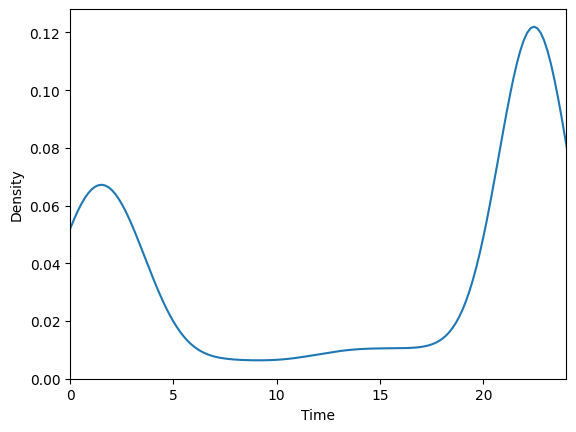

In [72]:
sns.kdeplot(data_fraud["Time"])
plt.xlim(left = 0,right = 24)
plt.show()

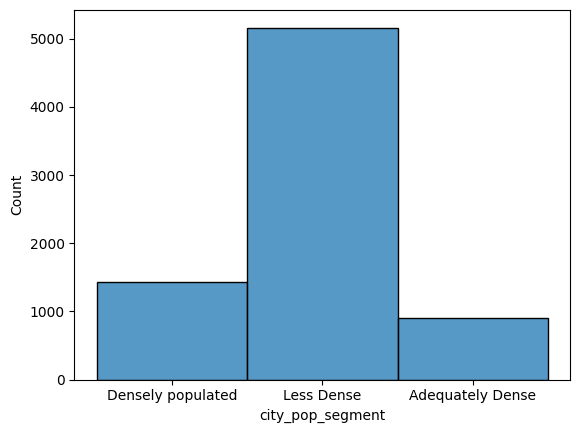

In [73]:
# lets have a look about the fraud transactions done in cities according to their populations
sns.histplot(data_fraud["city_pop_segment"])
plt.show()


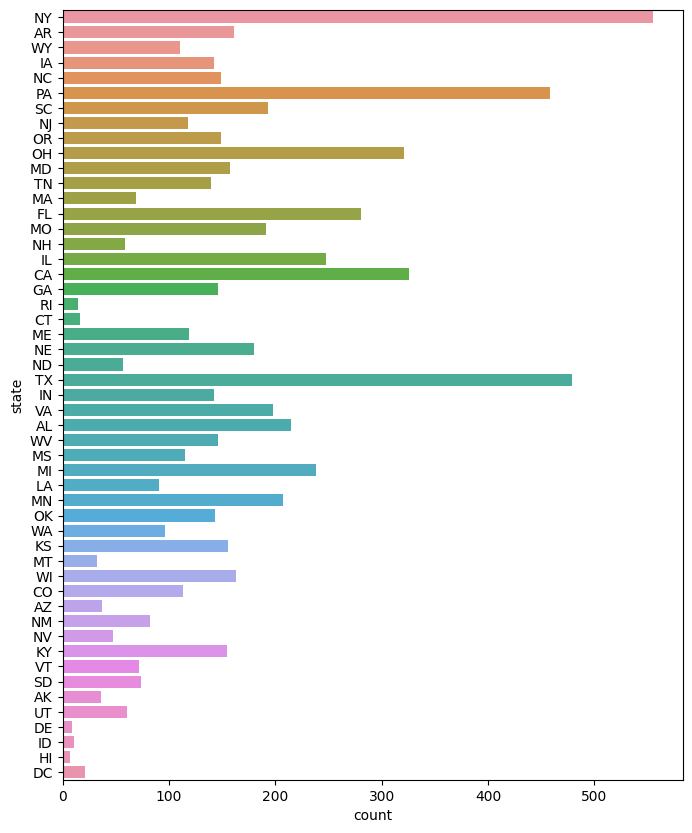

In [74]:
# let's have a look on state-wise fraud transactions
plt.figure(figsize = [8,10])
sns.countplot(y=data_fraud.state)
plt.show()

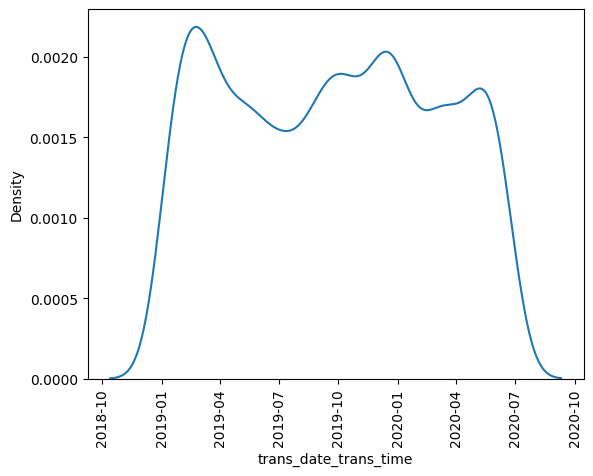

In [75]:
sns.kdeplot(data_fraud.trans_date_trans_time)
plt.xticks(rotation = 90)
plt.show()

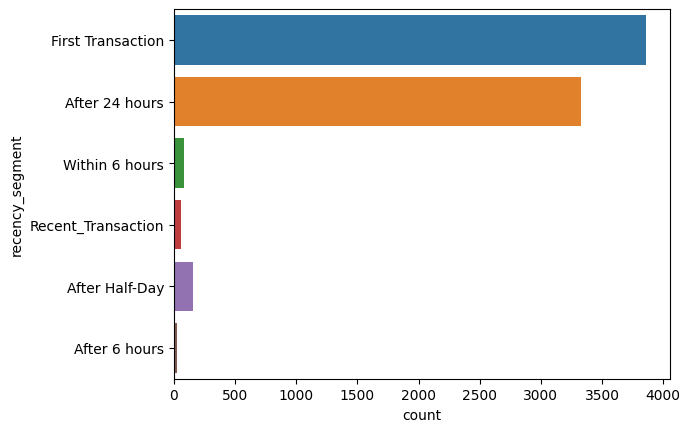

In [76]:
sns.countplot(y=data_fraud.recency_segment)
plt.show()

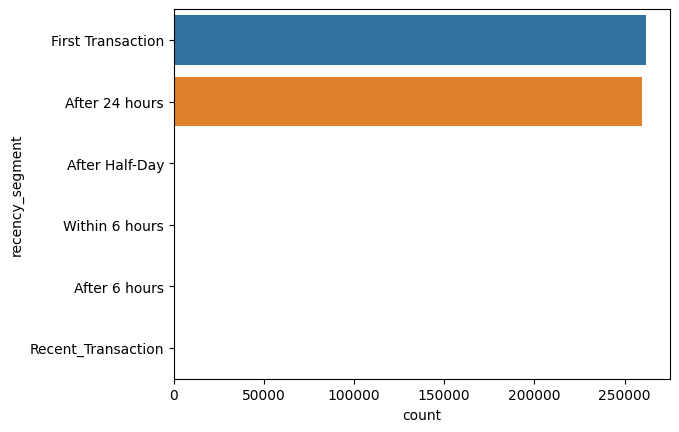

In [77]:
sns.countplot(y=data.recency_segment)
plt.show()

In [78]:
data["recency_segment"].value_counts()

recency_segment
First Transaction     261978
After 24 hours        259808
After Half-Day           661
Within 6 hours           312
After 6 hours            296
Recent_Transaction       119
Name: count, dtype: int64

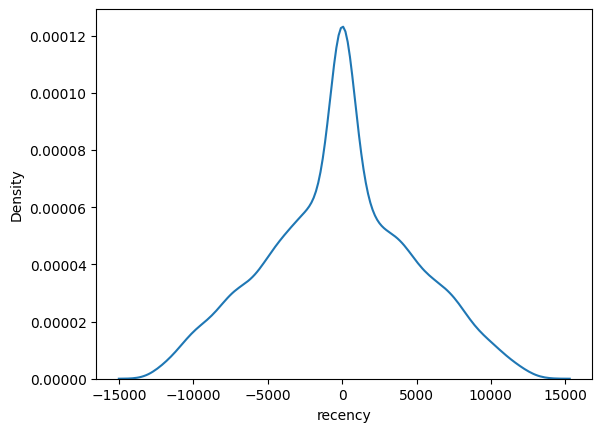

In [79]:
# checking how recent the transaction is can be termed as fraud
sns.kdeplot(data_fraud.recency)
#plt.xlim(right = 15000,left = -1)
plt.show()

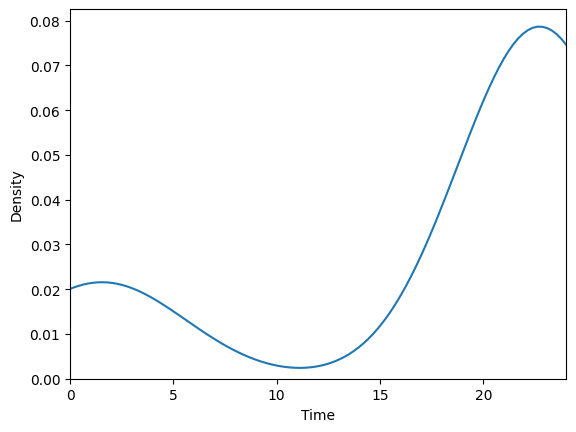

In [80]:
sns.kdeplot(data_fraud[data_fraud["recency_segment"] == "Recent_Transaction"].Time)
plt.xlim(left=0,right=24)
plt.show()

In [81]:
# checking separately for first transactions done through credit cards.
(data_fraud[data["recency_segment"] == "First Transaction"]["is_fraud"].sum()/len(data[data["recency"]<0]["is_fraud"]))*100

1.473406163876356

In [82]:
data_fraud.shape

(7506, 15)

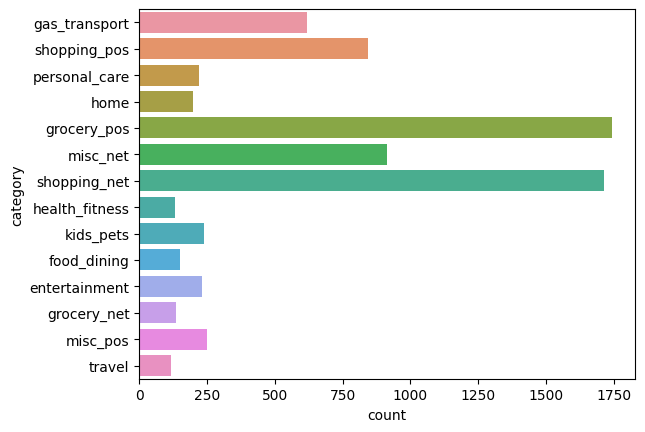

In [83]:
sns.countplot(y=data_fraud.category)
plt.show()

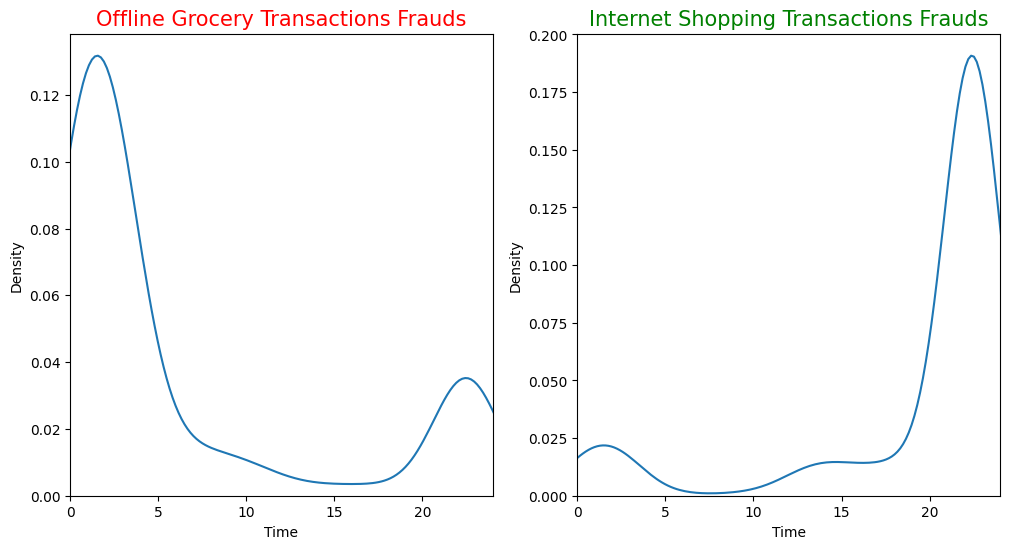

In [84]:
plt.figure(figsize=[12,6])
plt.subplot(121)
sns.kdeplot(x=data_fraud[data_fraud.category == "grocery_pos"].Time)
plt.xlim(left=0,right=24)
plt.title(label = "Offline Grocery Transactions Frauds", fontdict = {"color": "Red", "size": 15, "weight" : "5"})
plt.subplot(122)
sns.kdeplot(x=data_fraud[data_fraud.category == "shopping_net"].Time)
plt.title(label = "Internet Shopping Transactions Frauds", fontdict = {"color": "Green", "size": 15, "weight" : "5"})
plt.xlim(left=0,right=24)
plt.show()


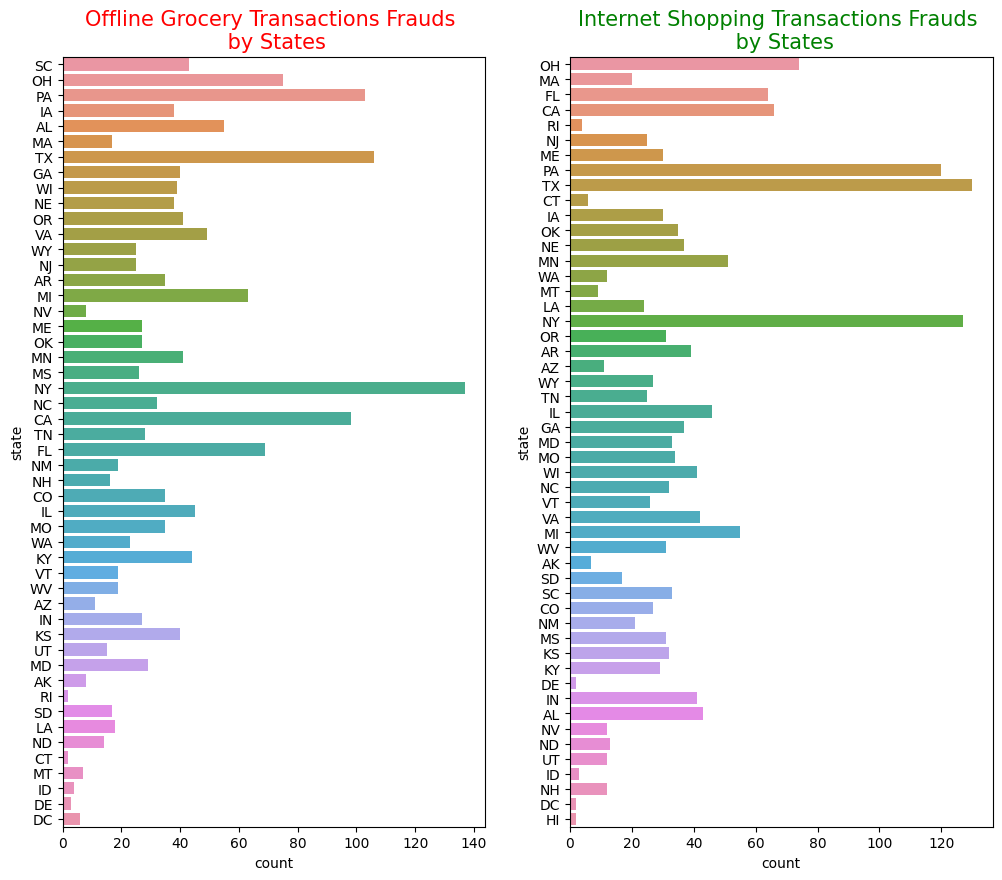

In [85]:
plt.figure(figsize=[12,10])
plt.subplot(121)
sns.countplot(y=data_fraud[data_fraud.category == "grocery_pos"].state)
plt.title(label = "Offline Grocery Transactions Frauds \n by States", fontdict = {"color": "Red", "size": 15, "weight" : "5"})
plt.subplot(122)
sns.countplot(y=data_fraud[data_fraud.category == "shopping_net"].state)
plt.title(label = "Internet Shopping Transactions Frauds \n by States", fontdict = {"color": "Green", "size": 15, "weight" : "5"})
plt.show()

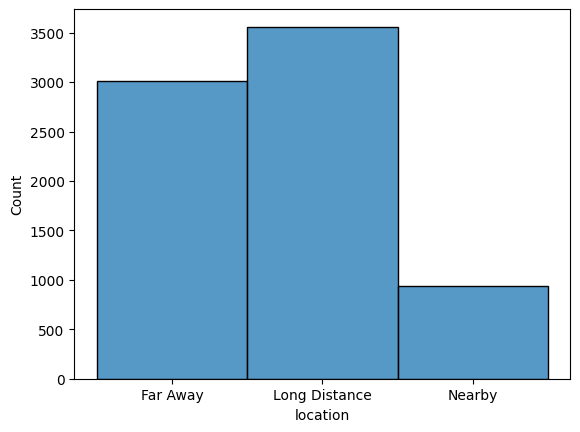

In [86]:
# let's check how far frauds happens from customer's residence
sns.histplot(data_fraud.location)
plt.show()

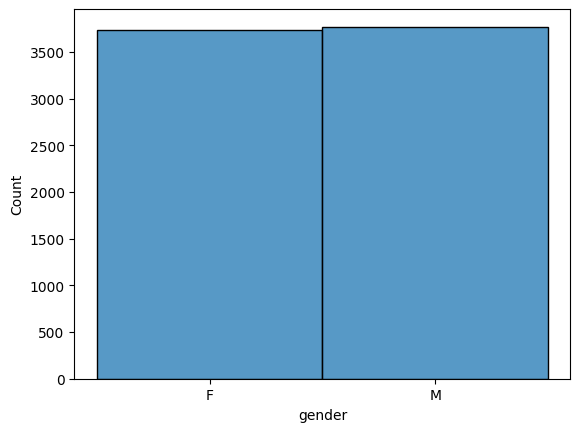

In [87]:
sns.histplot(data_fraud['gender'])
plt.show()

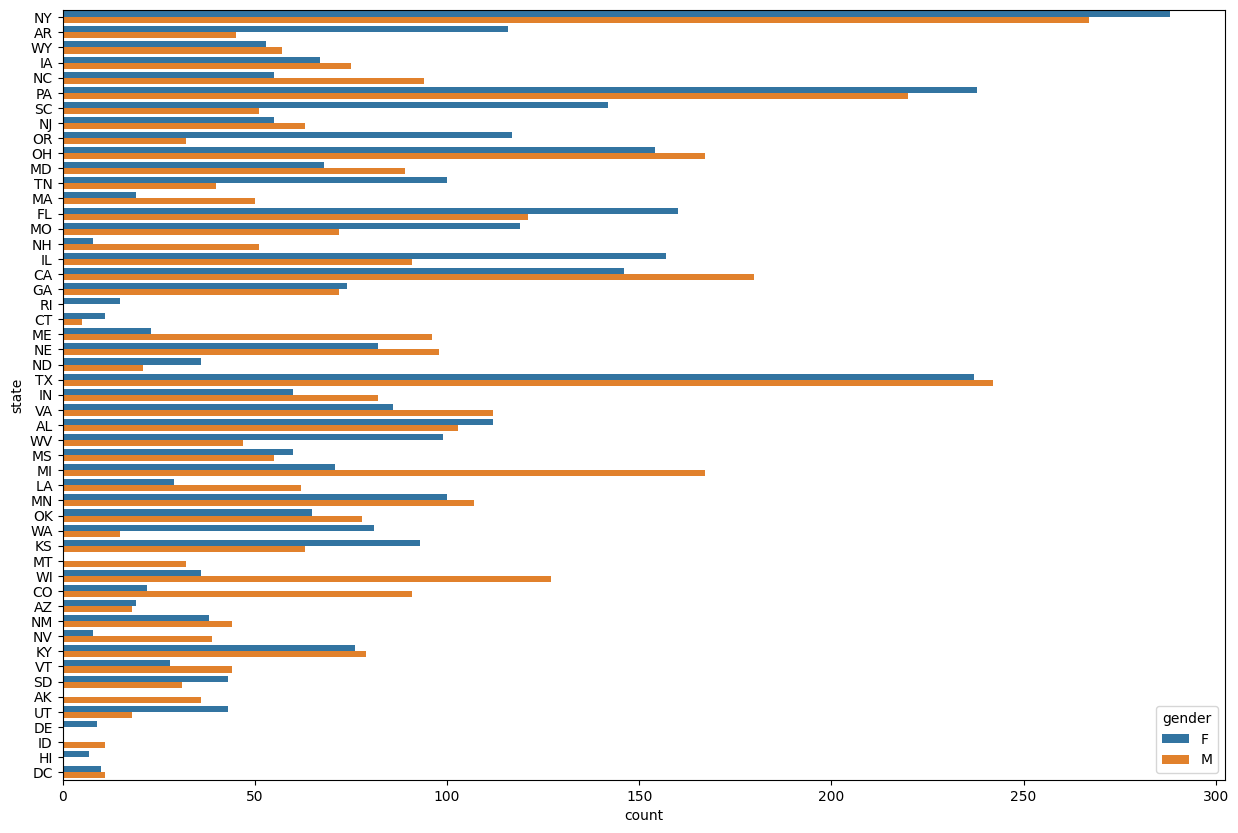

In [88]:
plt.figure(figsize = [15,10])
sns.countplot(y=data_fraud.state, hue=data_fraud.gender)
plt.show()

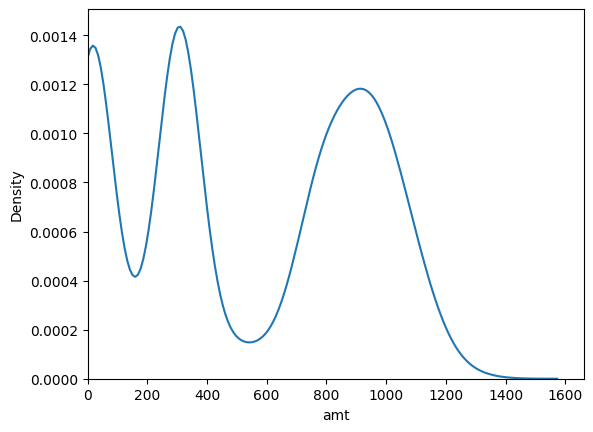

In [89]:
sns.kdeplot(data_fraud.amt)
plt.xlim(left=0)
plt.show()

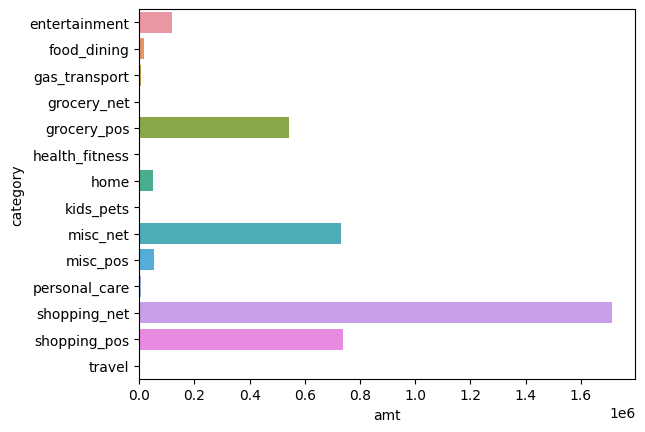

In [90]:
# Let's see in which category the losses are huge
data_cat = data_fraud.groupby(by="category")["amt"].sum()
sns.barplot(y=data_cat.index, x=data_cat)
plt.show()


In [91]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 57 to 522982
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  7506 non-null   datetime64[ns]
 1   cc_num                 7506 non-null   int64         
 2   merchant               7506 non-null   object        
 3   category               7506 non-null   object        
 4   amt                    7506 non-null   float64       
 5   gender                 7506 non-null   object        
 6   state                  7506 non-null   object        
 7   job                    7506 non-null   object        
 8   is_fraud               7506 non-null   int64         
 9   recency                7506 non-null   float64       
 10  displacement           7506 non-null   float64       
 11  location               7506 non-null   object        
 12  Time                   7506 non-null   int32         
 13  city_

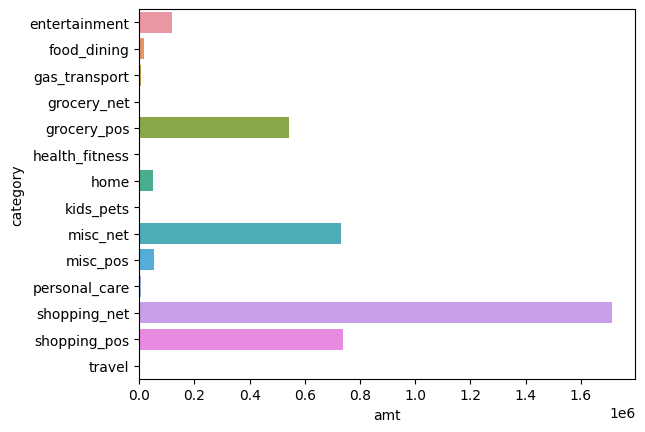

,Category,Ticket Size
0,shopping_net,1711723.71
1,shopping_pos,739245.09
2,misc_net,729266.76
3,grocery_pos,543797.90
4,entertainment,117323.79
5,misc_pos,54571.02
6,home,50971.66
7,food_dining,18131.62
8,gas_transport,7594.11
9,personal_care,5757.52


In [92]:
data_cat = data_fraud.groupby(by=["category", "is_fraud"])["amt"].sum().reset_index()

# Filter only the fraud entries
data_fraud_only = data_cat[data_cat["is_fraud"] == True]

sns.barplot(y=data_fraud_only["category"], x=data_fraud_only["amt"])
plt.show()

# Creating a DataFrame for Ticket Size
data_ticket = pd.DataFrame({"Category": data_fraud_only["category"], "Ticket Size": data_fraud_only["amt"]})
data_ticket.sort_values(by="Ticket Size", ascending=False, inplace=True)
data_ticket.reset_index(drop=True, inplace=True)

data_ticket


# Model Building 

**Logistic Regression**

**Building a model***

In [93]:
data4 = data.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data5 = pd.get_dummies(data=data4,columns=["category","gender","recency_segment","city_pop_segment","location"], drop_first=True)

# assigning them to test dataset

data6 = data_t.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data_test = pd.get_dummies(data=data6,columns=["category","gender","recency_segment","city_pop_segment","location"], drop_first=True)

In [94]:
data_test.head()

,amt,recency,displacement,Time,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,gender_M,recency_segment_After 6 hours,recency_segment_After Half-Day,recency_segment_First Transaction,recency_segment_Recent_Transaction,recency_segment_Within 6 hours,city_pop_segment_Densely populated,city_pop_segment_Less Dense,location_Long Distance,location_Nearby
0,2.86,-0.000278,29.260485,12,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,True
1,29.84,-0.000278,109.084144,12,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,41.28,-0.000278,75.126661,12,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,60.05,-0.000278,27.608319,12,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,True
4,3.19,-0.000278,123.069725,12,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False


In [95]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [96]:
data5[["amt","Time","displacement","recency"]] = sc.fit_transform(data5[["amt","Time","displacement","recency"]])

In [97]:
data5.head()

,amt,is_fraud,recency,displacement,Time,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,gender_M,recency_segment_After 6 hours,recency_segment_After Half-Day,recency_segment_First Transaction,recency_segment_Recent_Transaction,recency_segment_Within 6 hours,city_pop_segment_Densely populated,city_pop_segment_Less Dense,location_Long Distance,location_Nearby
0,-0.406597,0,0.000003,-0.682602,-0.412513,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,-0.411882,0,0.000003,-0.344847,1.195999,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.446238,0,0.000003,-2.026203,-0.412513,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,-0.253464,0,0.000003,-0.104631,0.464857,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
4,-0.269318,0,0.000003,-0.208874,1.195999,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False


In [98]:
y= data5.is_fraud[:]
x=data5.drop("is_fraud",axis=1)


In [99]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   amt                                 523174 non-null  float64
 1   is_fraud                            523174 non-null  int64  
 2   recency                             523174 non-null  float64
 3   displacement                        523174 non-null  float64
 4   Time                                523174 non-null  float64
 5   category_food_dining                523174 non-null  bool   
 6   category_gas_transport              523174 non-null  bool   
 7   category_grocery_net                523174 non-null  bool   
 8   category_grocery_pos                523174 non-null  bool   
 9   category_health_fitness             523174 non-null  bool   
 10  category_home                       523174 non-null  bool   
 11  category_kids_pets        

In [100]:
boolean_columns = data5.select_dtypes(include=bool).columns
data5[boolean_columns] = data5[boolean_columns].astype(int)

In [101]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   amt                                 523174 non-null  float64
 1   is_fraud                            523174 non-null  int64  
 2   recency                             523174 non-null  float64
 3   displacement                        523174 non-null  float64
 4   Time                                523174 non-null  float64
 5   category_food_dining                523174 non-null  int64  
 6   category_gas_transport              523174 non-null  int64  
 7   category_grocery_net                523174 non-null  int64  
 8   category_grocery_pos                523174 non-null  int64  
 9   category_health_fitness             523174 non-null  int64  
 10  category_home                       523174 non-null  int64  
 11  category_kids_pets        

In [102]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming data5 is your DataFrame
scaler = StandardScaler()
numeric_cols = ["amt", "Time", "recency", "displacement"]
data5[numeric_cols] = scaler.fit_transform(data5[numeric_cols])

# Convert boolean columns to integers
boolean_columns = data5.select_dtypes(include=bool).columns
data5[boolean_columns] = data5[boolean_columns].astype(int)

# Set up target variable y and features x
y = data5["is_fraud"]
x = data5.drop("is_fraud", axis=1)

# Add a constant term to the independent variables
X = sm.add_constant(x)

# Fit the logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Display the summary
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:               523174
Model:                            GLM   Df Residuals:                   523146
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28479.
Date:                Wed, 22 Nov 2023   Deviance:                       56958.
Time:                        17:20:23   Pearson chi2:                 6.08e+16
No. Iterations:                    11   Pseudo R-squ. (CS):            0.04055
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# Random forest regressor

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
train = data5[:int(len(data5)*0.8)]
test = data5[int(len(data5)*0.8):]
train.shape, test.shape

((418539, 28), (104635, 28))

In [105]:
target = 'is_fraud'

X_train = train.drop(target, axis=1)
y_train = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

X_train.shape, y_train.shape

((418539, 27), (418539,))

**Oversampling data to compensate for the high class imbalance in the data**

In [106]:

# Using ADASYN to oversample

from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 412569), (1, 412428)]


In [107]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [108]:
#data5 is entire train data set
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)


In [109]:
rf.fit(x,y)

RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [110]:
rf.oob_score_

0.9931972919143536

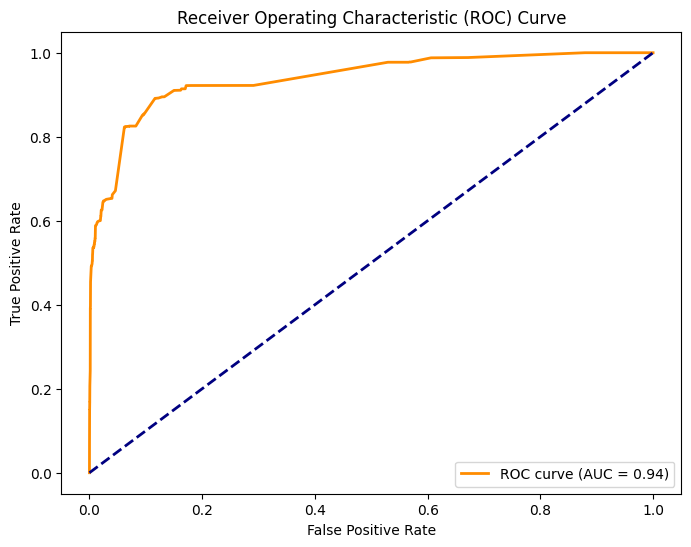

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained model 'rf_model' and test data 'X_test', 'y_test'
# rf_model = ...

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_train_res)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_res, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [112]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [113]:

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,7.458820e-01
3,Time,1.025527e-01
7,category_grocery_pos,9.242955e-02
14,category_shopping_net,1.781557e-02
5,category_gas_transport,1.113659e-02
12,category_misc_pos,8.826461e-03
17,gender_M,6.004865e-03
16,category_travel,5.701198e-03
1,recency,4.079773e-03
9,category_home,1.736316e-03


In [114]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70    412569
           1       1.00      0.16      0.28    412428

    accuracy                           0.58    824997
   macro avg       0.77      0.58      0.49    824997
weighted avg       0.77      0.58      0.49    824997



**Predicting on test set**

In [116]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [117]:

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    103099
           1       0.96      0.56      0.71      1536

    accuracy                           0.99    104635
   macro avg       0.98      0.78      0.85    104635
weighted avg       0.99      0.99      0.99    104635



**Testing model on original data without oversampling**

In [118]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    412569
           1       0.95      0.56      0.70      5970

    accuracy                           0.99    418539
   macro avg       0.97      0.78      0.85    418539
weighted avg       0.99      0.99      0.99    418539

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    103099
           1       0.96      0.56      0.71      1536

    accuracy                           0.99    104635
   macro avg       0.98      0.78      0.85    104635
weighted avg       0.99      0.99      0.99    104635



**ROC curve on train data set without oversampling**

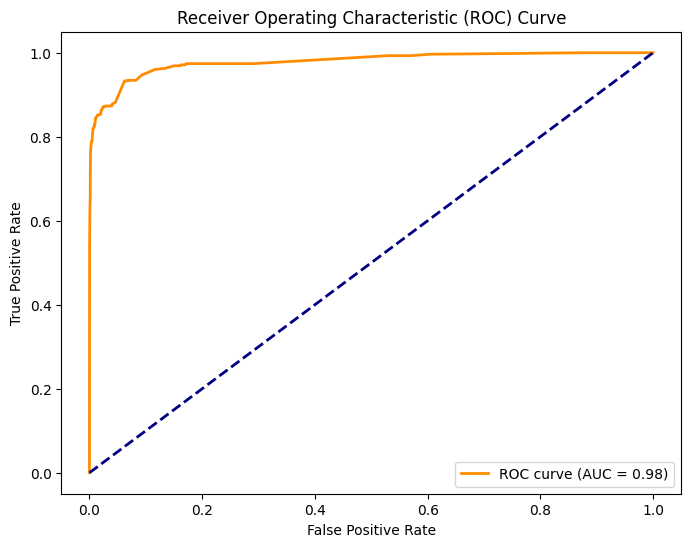

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained model 'rf_model' and test data 'X_test', 'y_test'
# rf_model = ...

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_train)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


****ROC curve on test data set without oversampling****

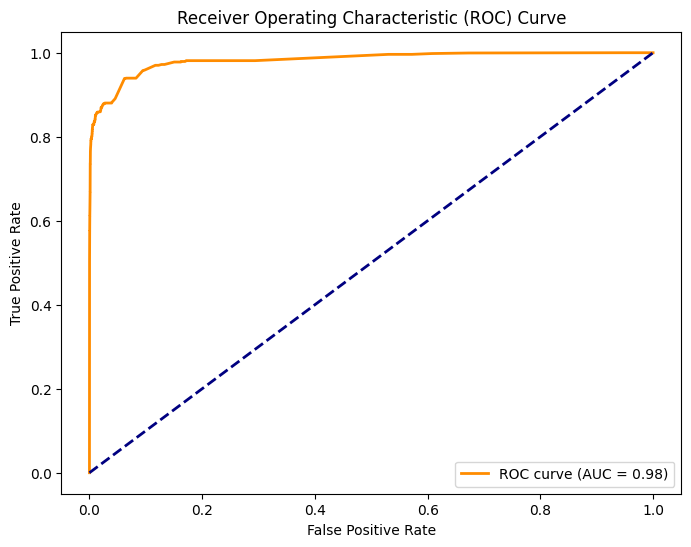

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained model 'rf_model' and test data 'X_test', 'y_test'
# rf_model = ...

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Output file for final prediction **

**Recursive function elimination**

In [121]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select= 22)
rfe_res = rfe.fit(x,y)

In [122]:
x.columns[rfe_res.support_]

Index(['amt', 'Time', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'recency_segment_After 6 hours', 'recency_segment_After Half-Day',
       'recency_segment_First Transaction',
       'recency_segment_Recent_Transaction', 'recency_segment_Within 6 hours',
       'city_pop_segment_Less Dense', 'location_Nearby'],
      dtype='object')

In [123]:
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('amt', True, 1),
 ('recency', False, 2),
 ('displacement', False, 4),
 ('Time', True, 1),
 ('category_food_dining', True, 1),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', False, 3),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('gender_M', True, 1),
 ('recency_segment_After 6 hours', True, 1),
 ('recency_segment_After Half-Day', True, 1),
 ('recency_segment_First Transaction', True, 1),
 ('recency_segment_Recent_Transaction', True, 1),
 ('recency_segment_Within 6 hours', True, 1),
 ('city_pop_segment_Densely populated', False, 6),
 ('city_pop_segment_Less Dense', True, 1),
 ('location_Long Distance', False, 5),
 ('location_Nearby', True, 1)]

In [124]:
cols = x.columns[rfe_res.support_]

In [125]:
model2 = sm.GLM(y,sm.add_constant(x[cols]),family = sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               523174
Model:                            GLM   Df Residuals:                   523151
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28484.
Date:                Wed, 22 Nov 2023   Deviance:                       56968.
Time:                        17:21:20   Pearson chi2:                 6.08e+16
No. Iterations:                    11   Pseudo R-squ. (CS):            0.04054
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -5.7463      0.057   -100.434      0.000      -5.858      -5.634
amt                                    0.6836      0.007     91.480      0.000       0.669       0.698
Time                                   0.6193      0.017     36.627      0.000       0.586       0.652
category_food_dining                  -0.3225      0.094     -3.415      0.001      -0.508      -0.137
category_gas_transport                 1.6985      0.069     24.701      0.000       1.564       1.833
category_grocery_net                   1.2855      0.103     12.466      0.000       1.083       1.488
category_grocery_pos                   2.5030      0.060     41.607      0.000       2.385       2.621
category_health_fitness               -0.4925      0.099     -4.972      0.000      -0.687      -0.298
category_home                         -0.4731      0.086     -5.527      0.000      -0.641      -0.305
category_kids_pets                    -0.1781      0.080     -2.215      0.027      -0.336      -0.020
category_misc_net                      1.6800      0.065     25.826      0.000       1.553       1.808
category_misc_pos                      0.2243      0.085      2.636      0.008       0.058       0.391
category_shopping_net                  1.0430      0.062     16.944      0.000       0.922       1.164
category_shopping_pos                  0.2584      0.068      3.802      0.000       0.125       0.392
category_travel                       -3.9660      0.281    -14.133      0.000      -4.516      -3.416
gender_M                               0.2193      0.026      8.372      0.000       0.168       0.271
recency_segment_After 6 hours          1.6081      0.270      5.964      0.000       1.080       2.137
recency_segment_After Half-Day         2.5818      0.137     18.868      0.000       2.314       2.850
recency_segment_First Transaction      0.1485      0.026      5.609      0.000       0.097       0.200
recency_segment_Recent_Transaction     3.5663      0.264     13.498      0.000       3.048       4.084
recency_segment_Within 6 hours         3.2352      0.167     19.388      0.000       2.908       3.562
city_pop_segment_Less Dense            0.0903      0.029      3.150      0.002       0.034       0.146
location_Nearby                       -0.0802      0.040     -2.020      0.043      -0.158      -0.002
======================================================================================================
"""

**Variance Inflation factors**

In [126]:
# importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
vif = pd.DataFrame({"Features":cols})
vif["VIF"] = [variance_inflation_factor(x[cols].values,i) for i in range(x[cols].shape[1])]
vif = vif.sort_values(by="VIF",ascending = False)

In [128]:
vif

,Features,VIF
20,city_pop_segment_Less Dense,2.666240
17,recency_segment_First Transaction,1.839106
1,Time,1.821901
14,gender_M,1.693644
3,category_gas_transport,1.591431
5,category_grocery_pos,1.537562
7,category_home,1.310329
8,category_kids_pets,1.276915
12,category_shopping_pos,1.230518
6,category_health_fitness,1.221209


In [129]:
pred = res2.predict(sm.add_constant(x[cols]))

In [130]:
predictions = pd.DataFrame({"Actual": y,"Pred_Prob" : pred})

In [131]:
predictions.head()

,Actual,Pred_Prob
0,0,0.015649
1,0,0.007538
2,0,0.045864
3,0,0.005149
4,0,0.008735


In [132]:
threshold = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for z in threshold:
  predictions[z] = predictions["Pred_Prob"].map(lambda x: 0 if x<z else 1)

In [133]:
predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015649,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.007538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.045864,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.005149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.008735,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Optimal Value**

In [134]:
import sklearn.metrics as metrics

In [135]:
curve = pd.DataFrame(index = threshold, columns = ["accuracy","sensitivity","specificity"])

In [136]:
for y in threshold:  
  matrix = metrics.confusion_matrix(predictions.Actual,predictions[y])
  accuracy = (matrix[1,1] + matrix[0,0])/ (matrix.sum())
  sensitivity = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
  specificity = (matrix[0,0])/(matrix[0,0] + matrix[0,1])

  curve.loc[y] = [accuracy,sensitivity,specificity]

In [137]:
curve

,accuracy,sensitivity,specificity
0.01,0.745731,0.771116,0.745361
0.02,0.887238,0.733946,0.88947
0.03,0.934884,0.722755,0.937972
0.04,0.962886,0.675593,0.967068
0.05,0.977528,0.60032,0.983018
0.06,0.983354,0.548228,0.989687
0.07,0.985395,0.525446,0.99209
0.08,0.986314,0.513456,0.993197
0.09,0.98688,0.50413,0.993907
0.10,0.98732,0.494804,0.994489


<Axes: >

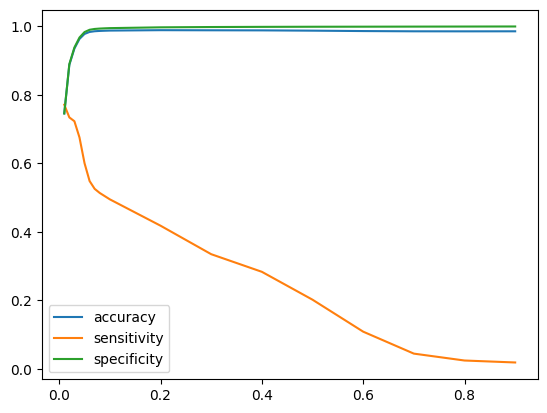

In [138]:
curve.plot()

In [139]:
for y in threshold:
  curve.loc[y,"Precision"] = metrics.precision_score(predictions.Actual,predictions[y])
  curve.loc[y,"Recall"] = metrics.recall_score(predictions.Actual,predictions[y])

<Axes: >

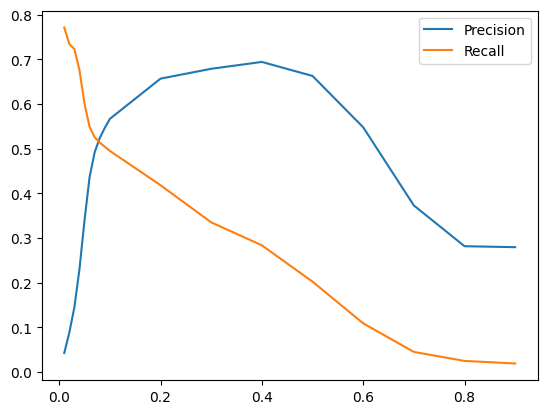

In [140]:
curve[["Precision","Recall"]].plot()

In [141]:
curve

,accuracy,sensitivity,specificity,Precision,Recall
0.01,0.745731,0.771116,0.745361,0.042218,0.771116
0.02,0.887238,0.733946,0.88947,0.088136,0.733946
0.03,0.934884,0.722755,0.937972,0.145011,0.722755
0.04,0.962886,0.675593,0.967068,0.229946,0.675593
0.05,0.977528,0.60032,0.983018,0.339742,0.600320
0.06,0.983354,0.548228,0.989687,0.436234,0.548228
0.07,0.985395,0.525446,0.99209,0.491587,0.525446
0.08,0.986314,0.513456,0.993197,0.523499,0.513456
0.09,0.98688,0.50413,0.993907,0.546347,0.504130
0.10,0.98732,0.494804,0.994489,0.566504,0.494804


**ROC curve**

In [142]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC Curve')
    
    plt.legend(loc="best")

    plt.show()

    return None 

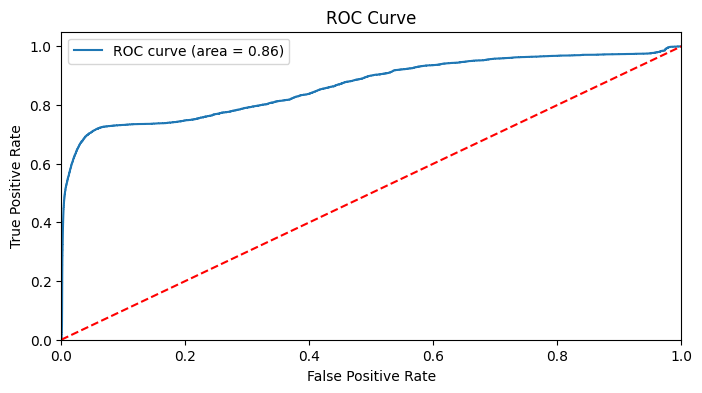

In [143]:
edu_roc(predictions["Actual"],predictions["Pred_Prob"])

**Test data set**

In [144]:

x_test = data_test

In [145]:
# Normalising the data
x_test[["amt","Time","displacement","recency"]] = sc.fit_transform(x_test[["amt","Time","displacement","recency"]])

In [146]:
boolean_columns = x_test.select_dtypes(include=bool).columns
x_test[boolean_columns] = x_test[boolean_columns].astype(int)

In [147]:
x_test[cols].dtypes

amt                                   float64
Time                                  float64
category_food_dining                    int64
category_gas_transport                  int64
category_grocery_net                    int64
category_grocery_pos                    int64
category_health_fitness                 int64
category_home                           int64
category_kids_pets                      int64
category_misc_net                       int64
category_misc_pos                       int64
category_shopping_net                   int64
category_shopping_pos                   int64
category_travel                         int64
gender_M                                int64
recency_segment_After 6 hours           int64
recency_segment_After Half-Day          int64
recency_segment_First Transaction       int64
recency_segment_Recent_Transaction      int64
recency_segment_Within 6 hours          int64
city_pop_segment_Less Dense             int64
location_Nearby                   

In [148]:
result = res2.predict(sm.add_constant(x_test[cols]))

In [149]:
predictions_test = pd.DataFrame({"Pred_Prob" : result})

In [150]:
predictions_test["Final"] = predictions_test["Pred_Prob"].map(lambda x: 0 if x<0.01 else 1)

In [151]:
predictions_test = predictions_test.rename_axis('id').reset_index()

In [152]:
predictions_test


,id,Pred_Prob,Final
0,0,0.002952,0
1,1,0.003161,0
2,2,0.001858,0
3,3,0.004732,0
4,4,0.000067,0
...,...,...,...
555714,555714,0.132492,1
555715,555715,0.204542,1
555716,555716,0.220126,1
555717,555717,0.004035,0


In [153]:
predictions_test = predictions_test.set_index('id')

In [154]:
predictions_test.index = predictions_test.index + 1

In [155]:
predictions_test=predictions_test.drop("Pred_Prob",axis=1)

In [156]:
predictions_test.rename(columns={'Final': 'is_fraud'}, inplace=True)

In [157]:
predictions_test


,is_fraud
id,
1,0
2,0
3,0
4,0
5,0
...,...
555715,1
555716,1
555717,1


In [158]:
predictions_test

,is_fraud
id,
1,0
2,0
3,0
4,0
5,0
...,...
555715,1
555716,1
555717,1


In [159]:
predictions_test.to_csv('/kaggle/working/output_final.csv')

In [160]:
predictions_test

,is_fraud
id,
1,0
2,0
3,0
4,0
5,0
...,...
555715,1
555716,1
555717,1
